# Model Evaluation

In [1]:
import time
import itertools

from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub

from src import utils#, eval_utils, rgbd_model, rgb_model, depth_model, hha_model, rgb_hha_model

## Load datasets

In [2]:
start_time = time.time()

print('loading rgbd train and test datasets')
train_data_path = 'C:/Users/awnya/Documents/Projects/RGBD Object Classification/RGBD_dataset' + '/train'
test_data_path = 'C:/Users/awnya/Documents/Projects/RGBD Object Classification/RGBD_dataset' + '/test'

# rgbd_train_dataset = utils.create_rgbd_dataset(train_data_path, azure=False)
rgbd_test_dataset = utils.create_rgbd_dataset(test_data_path, azure=False)

print(f'done! took {time.time()-start_time:.2f} seconds')

loading rgbd train and test datasets
done! took 42.69 seconds


In [3]:
# start_time = time.time()

# print('loading rgb train and test datasets')
# train_data_path = 'C:/Users/awnya/Documents/Projects/RGBD Object Classification/RGBD_dataset' + '/train'
# test_data_path = 'C:/Users/awnya/Documents/Projects/RGBD Object Classification/RGBD_dataset' + '/test'

# rgb_train_dataset = utils.create_rgb_dataset(train_data_path, azure=False)
# rgb_test_dataset = utils.create_rgb_dataset(test_data_path, azure=False)

# print(f'done! took {time.time()-start_time:.2f} seconds')

In [4]:
# start_time = time.time()

# print('loading depth train and test datasets')
# train_data_path = 'C:/Users/awnya/Documents/Projects/RGBD Object Classification/RGBD_dataset' + '/train'
# test_data_path = 'C:/Users/awnya/Documents/Projects/RGBD Object Classification/RGBD_dataset' + '/test'

# depth_train_dataset = utils.create_depth_dataset(train_data_path, azure=False)
# depth_test_dataset = utils.create_depth_dataset(test_data_path, azure=False)

# print(f'done! took {time.time()-start_time:.2f} seconds')

## Load predictions

In [5]:
rgbd_pred = np.loadtxt('preds/rgbd_test_pred.txt').astype(int)
rgbd_true = np.loadtxt('preds/rgbd_test_true.txt').astype(int)

In [6]:
acc = np.average(rgbd_pred==rgbd_true)
acc

0.5474658539338526

In [7]:
from sklearn.metrics import classification_report, confusion_matrix

In [8]:
classes = list(rgbd_test_dataset.label_int_dict.keys())
ind_class_dict = {i: c for c, i in rgbd_test_dataset.label_int_dict.items()}

In [9]:
print(classification_report(rgbd_true, rgbd_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       629
           1       0.04      0.00      0.00       763
           2       0.99      0.81      0.89       687
           3       0.99      0.13      0.22       618
           4       0.00      0.00      0.00       727
           5       0.00      0.00      0.00       782
           6       0.95      0.53      0.68       557
           7       0.00      0.00      0.00       529
           8       0.79      0.05      0.09       635
           9       0.00      0.00      0.00       545
          10       0.99      0.19      0.32       542
          11       0.00      0.00      0.00       786
          12       0.00      0.00      0.00       584
          13       0.00      0.00      0.00       533
          14       1.00      0.53      0.69       583
          15       1.00      0.84      0.91       772
          16       0.65      0.82      0.73       781
          17       0.00    

In [10]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    fig, ax = plt.subplots(figsize=[20,20])

    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)
    fig.colorbar(im)
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks, classes)#, rotation=45)
    ax.set_yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

    return fig, ax

In [13]:
cm = confusion_matrix(rgbd_true, rgbd_pred)

Confusion matrix, without normalization
[[  0   0   0 ...   0   0   0]
 [  0   1   0 ...   9  13 390]
 [  0   0 556 ...   0  17   0]
 ...
 [  0   0   0 ... 539   0   0]
 [  0   0   0 ...   0 789   0]
 [  0   0   0 ...   0   0 773]]


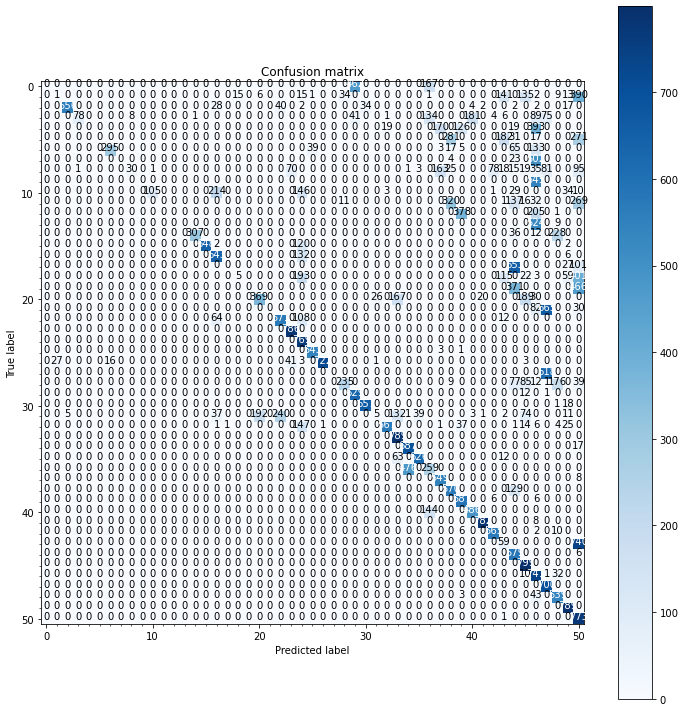

In [14]:
plot_confusion_matrix(cm, classes)